In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Configura o matplotlib para exibir plots maiores e mais legíveis
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
# Caminho para a pasta contendo as imagens
image_folder = 'data/store_scene'

# Lista para armazenar as imagens carregadas
images = []
image_names = []

# Itera sobre todos os arquivos na pasta especificada
print(f"Procurando imagens em: '{os.path.abspath(image_folder)}'")
if not os.path.isdir(image_folder):
    print("ERRO: O diretório não foi encontrado! Crie a pasta 'data/store_scene' e adicione suas imagens.")
else:
    for filename in sorted(os.listdir(image_folder)):
        # Verifica se o arquivo é uma imagem
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Constrói o caminho completo para a imagem
            img_path = os.path.join(image_folder, filename)
            
            # Carrega a imagem usando o OpenCV
            img = cv2.imread(img_path)
            
            # Verifica se a imagem foi carregada corretamente
            if img is not None:
                images.append(img)
                image_names.append(filename)
            else:
                print(f"Não foi possível carregar a imagem: {filename}")

    print(f"Total de imagens carregadas: {len(images)}")

Procurando imagens em: '/Users/mengo/Documents/Doutorado/2025s2/MO446/T1/data/store_scene'
Total de imagens carregadas: 5


Imagem: 'image_2051.jpg' - Keypoints detectados: 2000


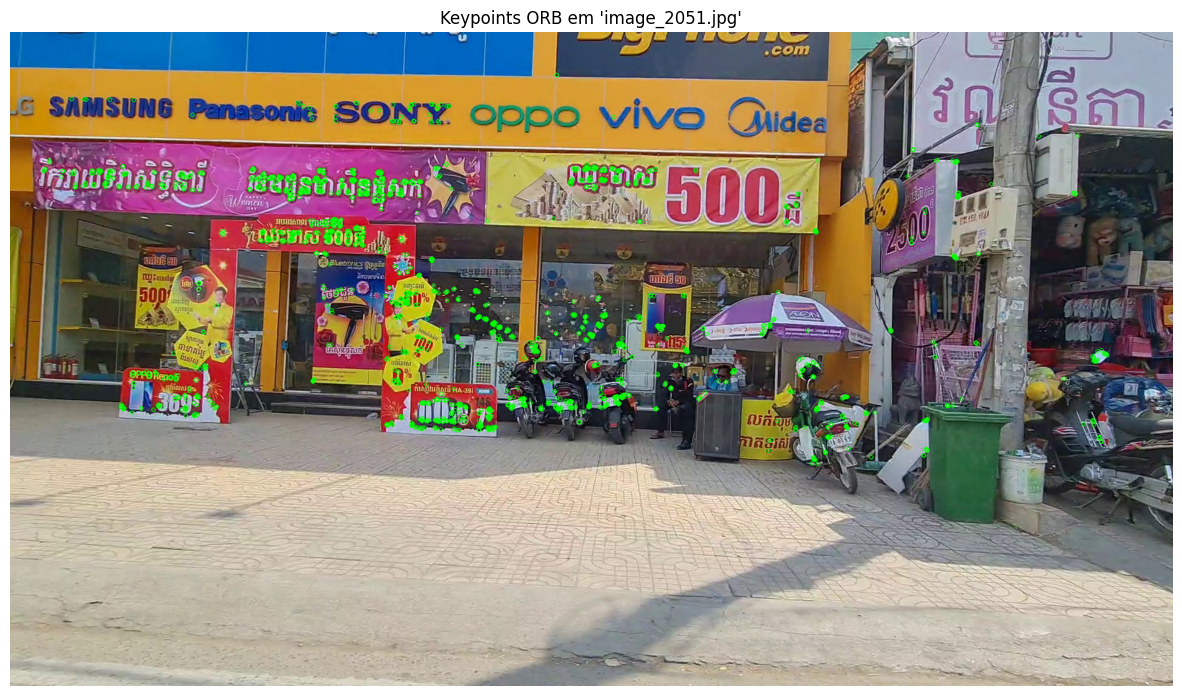

Imagem: 'image_2052.jpg' - Keypoints detectados: 2000


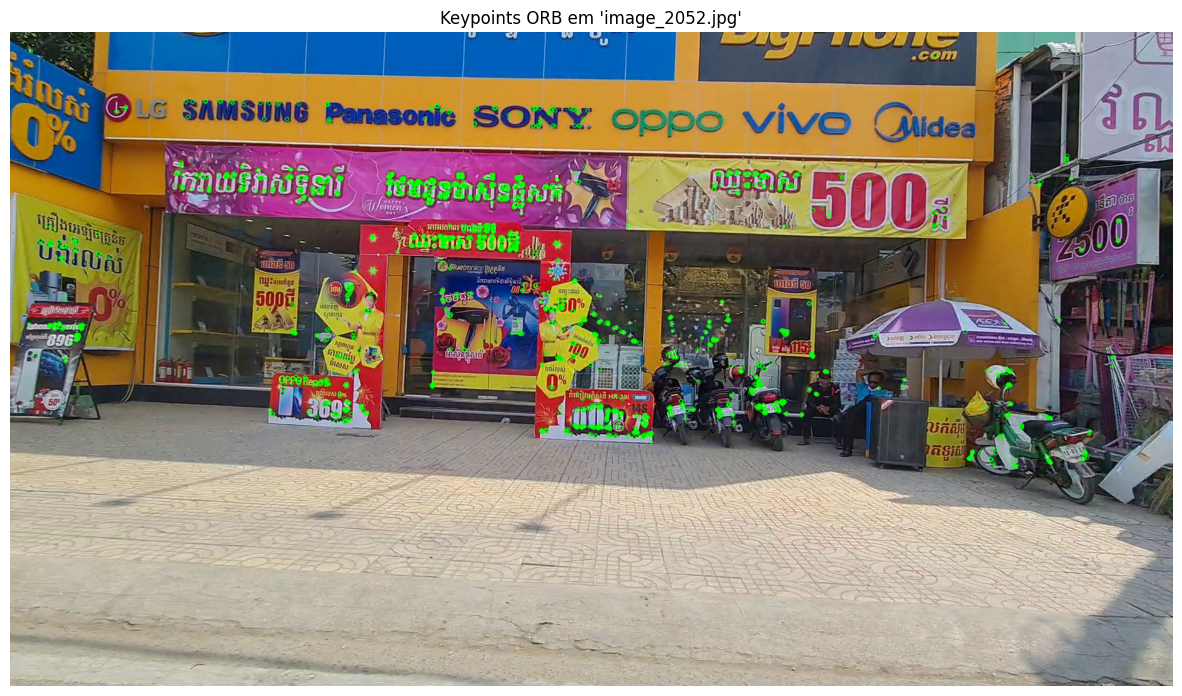

Imagem: 'image_2053.jpg' - Keypoints detectados: 2000


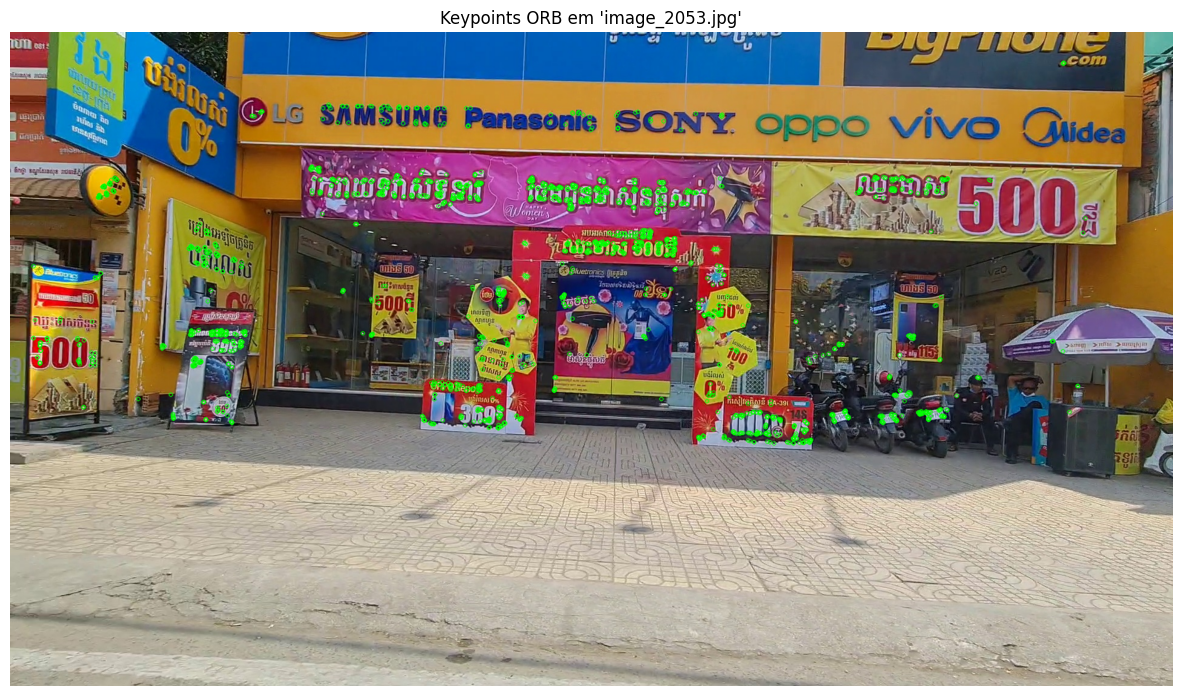

Imagem: 'image_2054.jpg' - Keypoints detectados: 2000


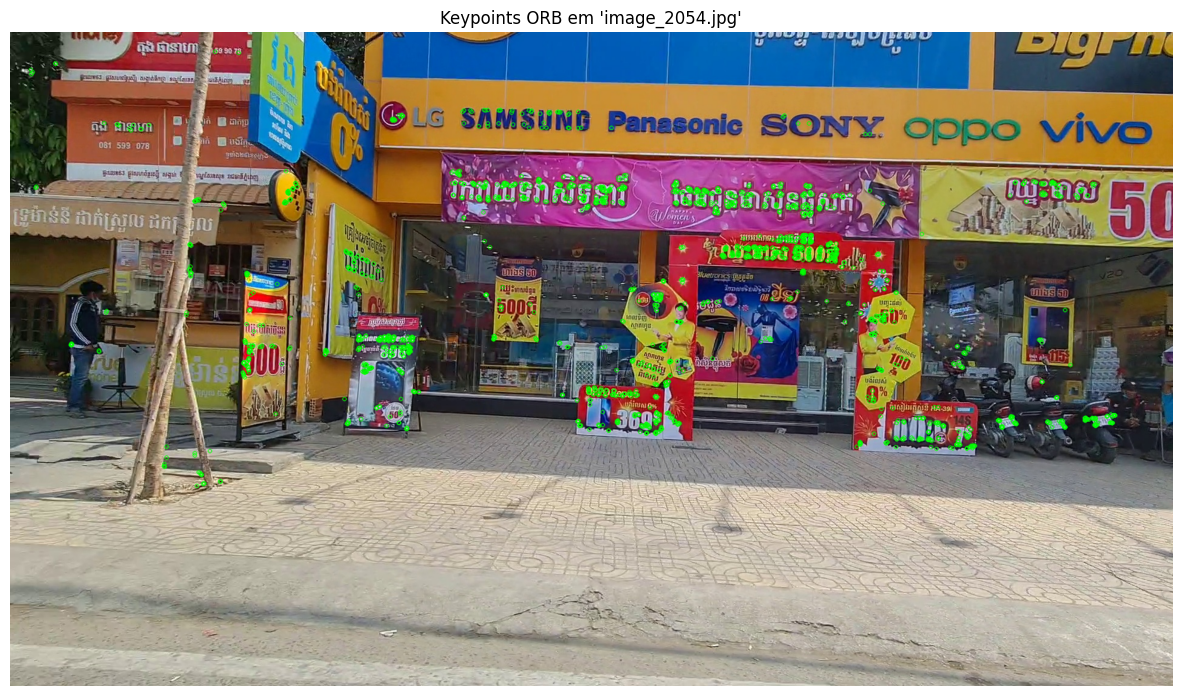

Imagem: 'image_2055.jpg' - Keypoints detectados: 2000


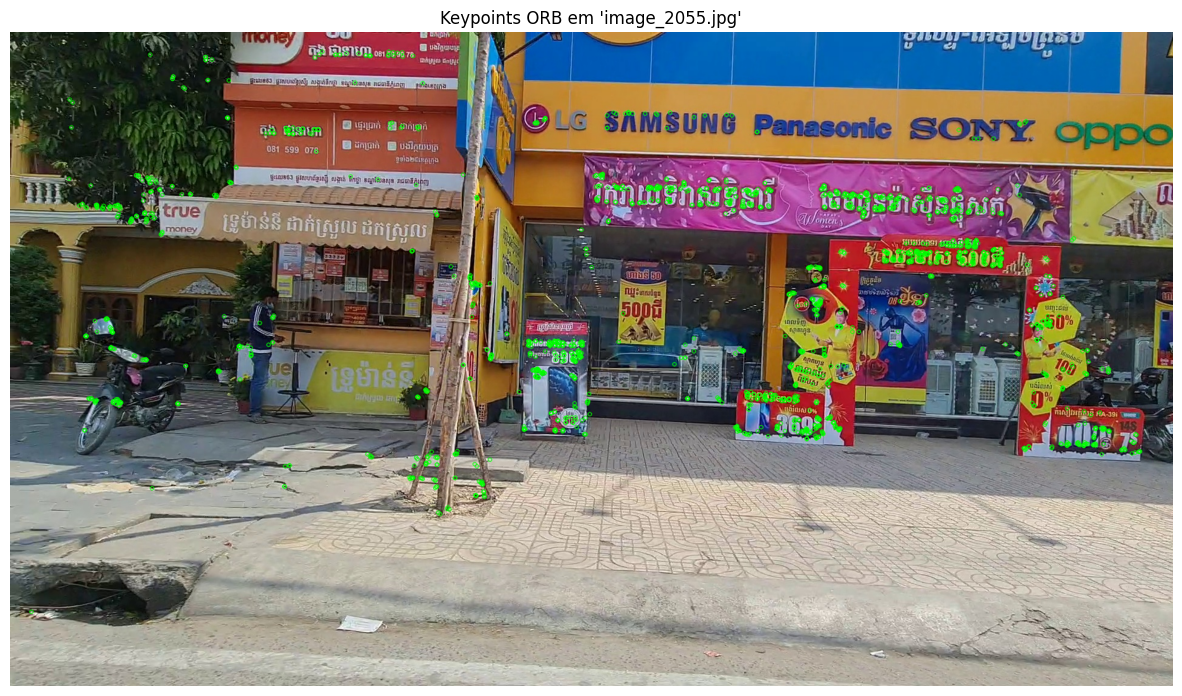

In [3]:
# 1. Inicializa o detector ORB
# nfeatures define o número máximo de keypoints a serem detectados
orb = cv2.ORB_create(nfeatures=2000)

# Itera sobre cada imagem carregada
for i, img in enumerate(images):
    # Converte a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2. Detecta os keypoints e calcula seus descritores
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    
    # 3. Desenha os keypoints na imagem original (colorida)
    img_with_keypoints = cv2.drawKeypoints(
        img, 
        keypoints, 
        None, # output image
        color=(0, 255, 0), # Desenha os keypoints em verde
        flags=0
    )
    
    print(f"Imagem: '{image_names[i]}' - Keypoints detectados: {len(keypoints)}")
    
    # 4. Exibe a imagem usando matplotlib
    # Converte de BGR (padrão do OpenCV) para RGB (padrão do Matplotlib)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(f"Keypoints ORB em '{image_names[i]}'")
    plt.axis('off') # Remove os eixos x e y
    plt.show()
